In [118]:
!pip install pycaret

In [119]:
import pandas as pd

In [141]:
dataset = pd.read_csv("C:\\Users\\navya\\Desktop\\MINI PROJECT\\Emotion_nb_dataset\\train.txt", delimiter=';', header=None, names=['sentence','label'])
dataset

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
17995,i just keep feeling like someone is being unki...,anger
17996,im feeling a little cranky negative after this...,anger
17997,i feel that i am useful to my people and that ...,joy
17998,im feeling more comfortable with derby i feel ...,joy


In [142]:
#check the shape of data
dataset.shape
dataset.tail()

,sentence,label
17995,i just keep feeling like someone is being unki...,anger
17996,im feeling a little cranky negative after this...,anger
17997,i feel that i am useful to my people and that ...,joy
17998,im feeling more comfortable with derby i feel ...,joy
17999,i feel all weird when i have to meet w people ...,fear


In [143]:
from pycaret.classification import *

In [144]:
data=dataset

In [145]:
exp_mclf101 = setup(data = data, target = 'label', session_id=123) 

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Multiclass
3,Target mapping,"anger: 0, fear: 1, joy: 2, love: 3, sadness: 4, surprise: 5"
4,Original data shape,"(18000, 2)"
5,Transformed data shape,"(18000, 2)"
6,Transformed train set shape,"(12600, 2)"
7,Transformed test set shape,"(5400, 2)"
8,Categorical features,1
9,Preprocess,True


In [146]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.3365,0.4989,0.3365,0.1133,0.1696,0.0002,0.0030,5.3080
dummy,Dummy Classifier,0.3365,0.5000,0.3365,0.1132,0.1695,0.0000,0.0000,0.8130
dt,Decision Tree Classifier,0.3359,0.4996,0.3359,0.1132,0.1693,-0.0005,-0.0057,0.7410
ridge,Ridge Classifier,0.3359,0.0000,0.3359,0.1132,0.1693,-0.0008,-0.0107,0.7550
lda,Linear Discriminant Analysis,0.3359,0.4991,0.3359,0.1132,0.1693,-0.0005,-0.0057,0.8410
et,Extra Trees Classifier,0.3359,0.4996,0.3359,0.1132,0.1693,-0.0005,-0.0057,1.2660
nb,Naive Bayes,0.3144,0.4992,0.3144,0.1033,0.1550,-0.0003,-0.0044,0.7100
qda,Quadratic Discriminant Analysis,0.3144,0.4992,0.3144,0.1033,0.1550,-0.0003,-0.0044,0.9420
svm,SVM - Linear Kernel,0.2887,0.0000,0.2887,0.0926,0.1392,-0.0007,-0.0108,0.8120
ada,Ada Boost Classifier,0.2848,0.4991,0.2848,0.0919,0.1379,-0.0005,-0.0061,0.9380


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4843,0.5565,0.4843,0.5244,0.3423,0.0468,0.1137
1,0.4900,0.5413,0.4900,0.4201,0.3576,0.0676,0.1337
2,0.4835,0.5586,0.4835,0.4111,0.3302,0.0371,0.1078
3,0.4864,0.5630,0.4864,0.4303,0.3392,0.0450,0.1210
4,0.4907,0.5510,0.4907,0.4749,0.3587,0.0657,0.1363
5,0.4907,0.5537,0.4907,0.4641,0.3461,0.0574,0.1392
6,0.4907,0.5770,0.4907,0.3916,0.3454,0.0549,0.1413
7,0.4921,0.5740,0.4921,0.5440,0.3463,0.0564,0.1595
8,0.4850,0.5460,0.4850,0.4028,0.3410,0.0498,0.1185


Processing:   0%|          | 0/4 [00:01<?, ?it/s]

In [96]:
print(nb)

GaussianNB(priors=None, var_smoothing=1e-09)


In [97]:
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4843,0.5588,0.4843,0.5345,0.3375,0.0415,0.1144
1,0.4871,0.5447,0.4871,0.4165,0.3520,0.0593,0.1232
2,0.4835,0.5582,0.4835,0.4981,0.3299,0.0364,0.1087
3,0.4807,0.5632,0.4807,0.3641,0.3283,0.0309,0.0923
4,0.4936,0.5519,0.4936,0.4984,0.3569,0.0651,0.1496
5,0.4907,0.5553,0.4907,0.5236,0.3456,0.0558,0.1406
6,0.4878,0.5758,0.4878,0.3910,0.3403,0.0479,0.1287
7,0.4921,0.5757,0.4921,0.5440,0.3463,0.0564,0.1595
8,0.4878,0.5476,0.4878,0.4539,0.3440,0.0525,0.1324


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [99]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_nb)

GaussianNB(priors=None, var_smoothing=1e-09)


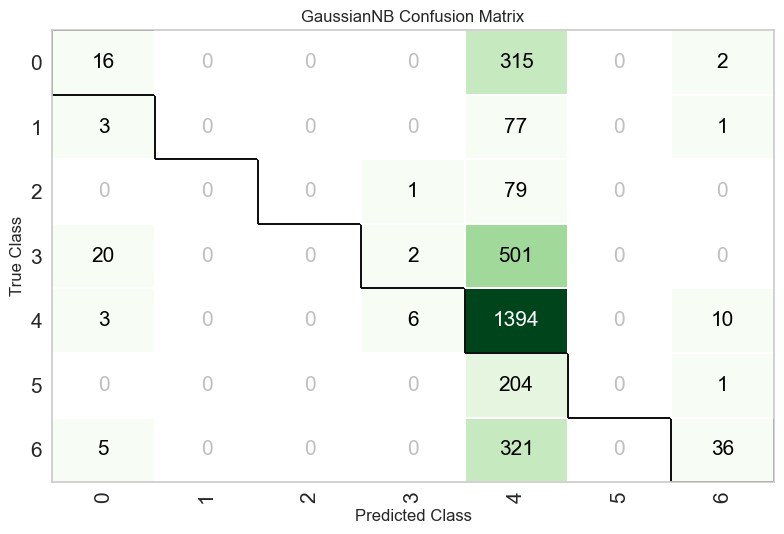

In [100]:
plot_model(tuned_nb, plot = 'confusion_matrix')

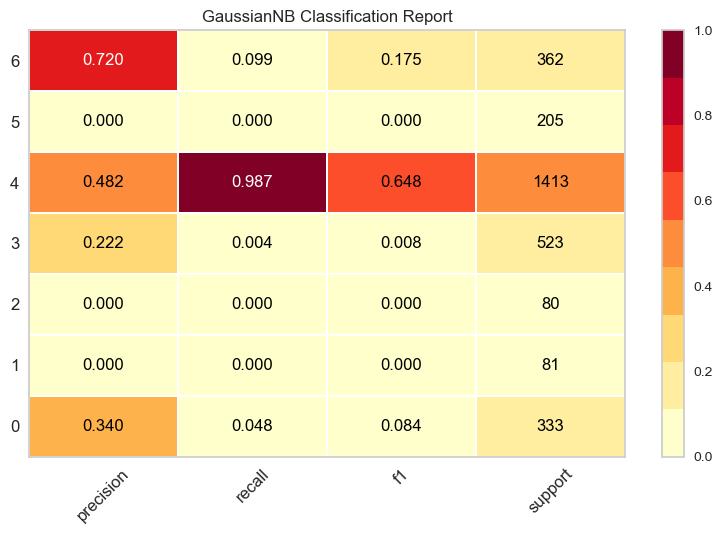

In [101]:
plot_model(tuned_nb, plot = 'class_report')

In [102]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [103]:
predict_model(tuned_nb);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.4831,0.5400,0.4831,0.3909,0.3372,0.0445,0.1085


In [109]:
data_unseen=pd.read_csv("C:\\Users\\navya\\Desktop\\MINI PROJECT\\test_sent_emo1.csv")

In [110]:
final_nb = finalize_model(tuned_nb)

In [111]:
predict_model(final_nb);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.4848,0.5464,0.4848,0.4487,0.3397,0.0465,0.1154


In [112]:
unseen_predictions = predict_model(final_nb, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.4935,0.5425,0.4935,0.4323,0.3495,0.0500,0.1138


,Sr No.,Utterance,Emotion,prediction_label,prediction_score
0,1,Why do all you’re coffee mugs have numbers on ...,6,neutral,0.6170
1,2,Oh. That’s so Monica can keep track. That way ...,0,neutral,0.6170
2,3,Y'know what?,4,neutral,0.6846
3,19,"Come on, Lydia, you can do it.",4,neutral,0.6170
4,20,Push!,3,neutral,0.6170


In [113]:
save_model(final_nb,'Final NB 03Jun2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\navya\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['Sr No.'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features...
                                                               drop_invariant=False,
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                

In [114]:
saved_final_nb = load_model('Final NB 03Jun2023')

Transformation Pipeline and Model Successfully Loaded


In [116]:
new_prediction = predict_model(saved_final_nb, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.4935,0.5425,0.4935,0.4323,0.3495,0.0500,0.1138


In [117]:
new_prediction.head()

,Sr No.,Utterance,Emotion,prediction_label,prediction_score
0,1,Why do all you’re coffee mugs have numbers on ...,6,neutral,0.6170
1,2,Oh. That’s so Monica can keep track. That way ...,0,neutral,0.6170
2,3,Y'know what?,4,neutral,0.6846
3,19,"Come on, Lydia, you can do it.",4,neutral,0.6170
4,20,Push!,3,neutral,0.6170
